# COURSE: Generate and visualize data in Python and MATLAB

## SECTION: Time series signals

### https://www.udemy.com/course/suv-data-mxc/?couponCode=201910

### INSTRUCTOR: sincxpress.com


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
from scipy.signal import hilbert
from scipy import interpolate

---
# VIDEO: Sharp transients
---


In [2]:
# simulation details for this video

srate = 100  # sampling rate in Hz
time = np.arange(-1, 2, 1 / srate)
pnts = len(time)

hz = np.linspace(0, srate / 2, int(np.floor(len(time) / 2) - 1))

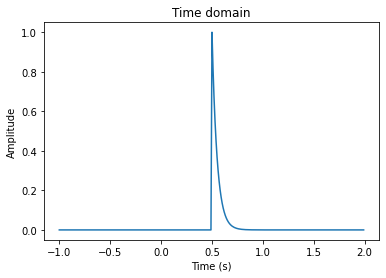

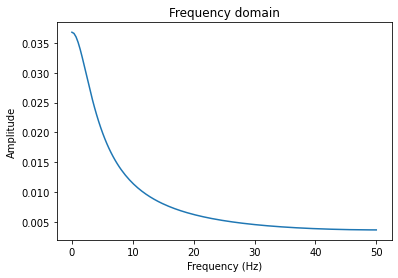

In [3]:
## impulse

# time of impulse
impulsetime = .5  # in seconds
tidx = np.argmin(np.abs(time - impulsetime))

# add impulse to signal
signal = np.zeros(len(time))
signal[tidx] = 1

# add exponential decay
expchange = np.exp(-np.arange(0, 49) / 5)

# uncomment to add impulse to signal
signal[tidx:tidx + len(expchange)] = expchange / np.max(expchange)

## plotting
plt.plot(time, signal)
plt.title('Time domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# compute amplitude spectrum
amp = 2 * abs(scipy.fftpack.fft(signal) / pnts)
plt.plot(hz, amp[0:len(hz)])
plt.title('Frequency domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

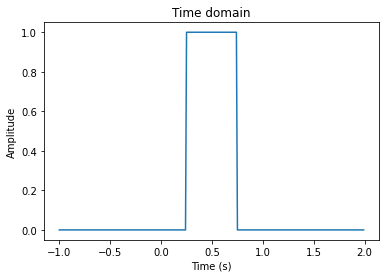

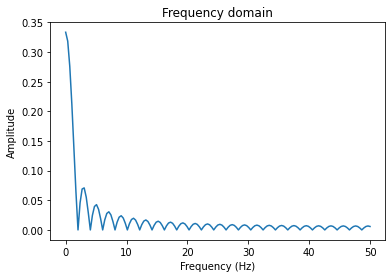

In [4]:
## square

squarestart = .25  # seconds
squareend = .75

# convert start/stop times to indices
tidx1 = np.argmin(np.abs(time - squarestart))
tidx2 = np.argmin(np.abs(time - squareend))

signal = np.zeros(len(time))
signal[tidx1:tidx2] = 1

## plotting
plt.plot(time, signal)
plt.title('Time domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# compute amplitude spectrum
amp = 2 * abs(scipy.fftpack.fft(signal) / pnts)
plt.plot(hz, amp[0:len(hz)])
plt.title('Frequency domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

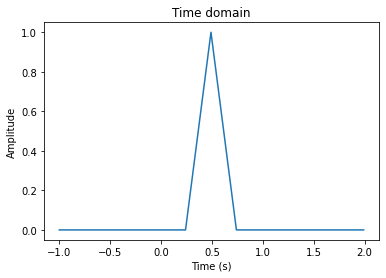

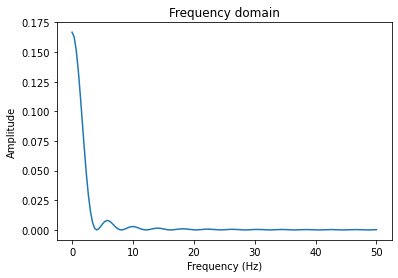

In [5]:
## triangle

triduration = .5  # duration in seconds
starttime = .25  # in seconds

# convert duration to indices
duridx = int(triduration * srate / 2)

y = np.cumsum([np.ones(duridx), -np.ones(duridx)])

signal = np.zeros(len(time))
tidx = np.argmin(np.abs(time - starttime))

signal[tidx:tidx + len(y)] = y / max(y)

## plotting
plt.plot(time, signal)
plt.title('Time domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# compute amplitude spectrum
amp = 2 * abs(scipy.fftpack.fft(signal) / pnts)
plt.plot(hz, amp[0:len(hz)])
plt.title('Frequency domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

---
# VIDEO: Smooth transients
---


In [6]:
# simulation details for this video

srate = 100  # sampling rate in Hz
time = np.arange(-1, 2, 1 / srate)
pnts = len(time)

hz = np.linspace(0, srate / 2, int(np.floor(len(time) / 2) - 1))

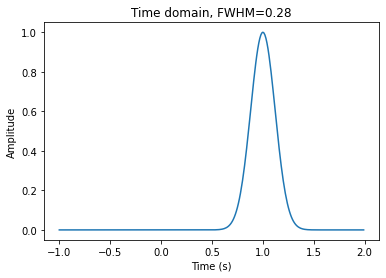

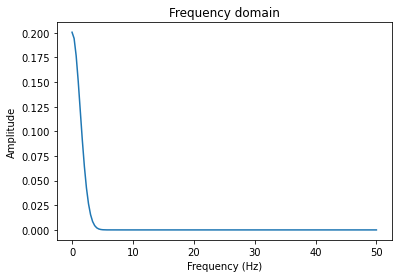

In [7]:
## Gaussian taper

peaktime = 1  # seconds
width = .12

signal = np.exp(-(time - peaktime)**2 / (2 * width**2))

# compute empirical FWHM
signorm = signal / max(signal)  # max-norm

# METHOD 1: maxes and mins
pidx = np.argmax(signorm)
lidx = np.argmin(abs(signorm[0:pidx] - .5))
ridx = np.argmin(abs(signorm[pidx:] - .5))
fwhm = time[ridx + pidx] - time[lidx]

# METHOD 2: find points closest to .5
troughs = np.where(np.diff(np.sign(np.diff(abs(signorm - .5)))) > 0)
fwhm = time[troughs[0][1]] - time[troughs[0][0]]

## plotting
plt.plot(time, signal)
plt.title('Time domain, FWHM=%g' % fwhm)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# compute amplitude spectrum
amp = 2 * abs(scipy.fftpack.fft(signal) / pnts)
plt.plot(hz, amp[0:len(hz)])
plt.title('Frequency domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

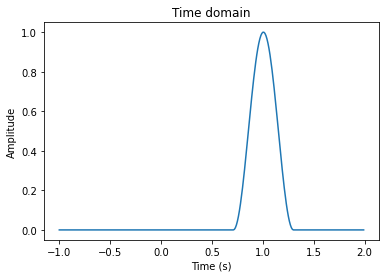

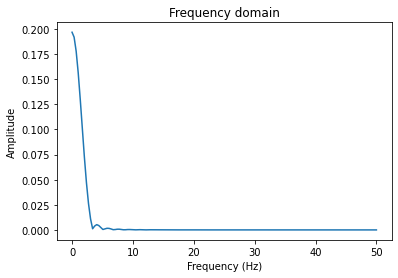

In [8]:
## Hann taper

hannduration = .6  # duration in seconds
peaktime = 1  # seconds

# convert duration to indices
n = np.round(hannduration * srate)
stidx = np.argmin(np.abs(time - peaktime))

hanntime = np.arange(0, n - 1)
hannwin = .5 * (1 - np.cos((2 * np.pi * hanntime) / (n - 1)))

signal = np.zeros(len(time))
signal[int(np.floor(stidx - n / 2) + 1):int(np.floor(stidx + n / 2))] = hannwin

## plotting
plt.plot(time, signal)
plt.title('Time domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# compute amplitude spectrum
amp = 2 * abs(scipy.fftpack.fft(signal) / pnts)
plt.plot(hz, amp[0:len(hz)])
plt.title('Frequency domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

C:\Users\MAN\AppData\Local\Temp/ipykernel_22488/726336049.py:16: RuntimeWarning: divide by zero encountered in true_divide
  Zl = eta * (n - 1) * (1 / pt + 1 / (pt - eta * (n - 1)))
C:\Users\MAN\AppData\Local\Temp/ipykernel_22488/726336049.py:17: RuntimeWarning: divide by zero encountered in true_divide
  Zr = eta * (n - 1) * (1 / (n - 1 - pt) + 1 / ((1 - eta) * (n - 1) - pt))


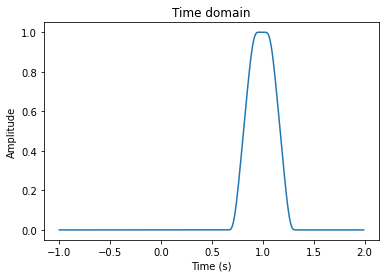

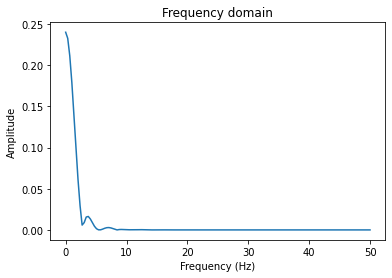

In [9]:
## Planck-taper

planckduration = .73  # duration in seconds
centtime = 1  # seconds

eta = .5  # between 0 and .5

# convert duration to indices
n = round(planckduration * srate)
pt = np.arange(1, n)

# find center point index
stidx = np.argmin(np.abs(time - centtime))

# define left and right exponentials
Zl = eta * (n - 1) * (1 / pt + 1 / (pt - eta * (n - 1)))
Zr = eta * (n - 1) * (1 / (n - 1 - pt) + 1 / ((1 - eta) * (n - 1) - pt))

bounds = [
    int(np.floor(eta * (n - 1)) - np.mod(n, 2)),
    int(np.ceil((1 - eta) * (n - ~np.mod(n, 2))))
]

left = 1 / (np.exp(Zl[range(0, bounds[0])]) + 1)
center = np.ones(bounds[1] - bounds[0])
right = 1 / (np.exp(Zr[bounds[1]:-1]) + 1)
plancktaper = np.concatenate((left, center, right), axis=0)

signal = np.zeros(len(time))
signal[int(stidx - np.floor(n / 2)):int(stidx + np.floor(n / 2)) - 1 -
       (1 - np.mod(n, 2))] = plancktaper

## plotting
plt.plot(time, signal)
plt.title('Time domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# compute amplitude spectrum
amp = 2 * abs(scipy.fftpack.fft(signal) / pnts)
plt.plot(hz, amp[0:len(hz)])
plt.title('Frequency domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

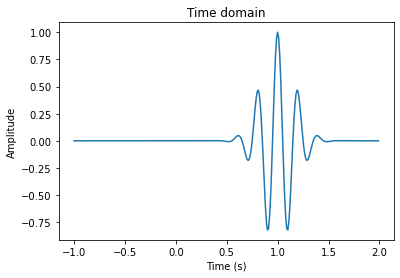

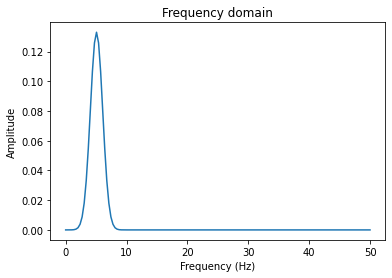

In [10]:
## Morlet wavelet

freq = 5  # in Hz

gausw = 5 / (2 * np.pi * freq)
centtime = 1  # center time point

signal = np.multiply(np.cos(2 * np.pi * freq * time),
                     np.exp(-(time - centtime)**2 / (2 * gausw**2)))

## plotting
plt.plot(time, signal)
plt.title('Time domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# compute amplitude spectrum
amp = 2 * abs(scipy.fftpack.fft(signal) / pnts)
plt.plot(hz, amp[0:len(hz)])
plt.title('Frequency domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

---
# VIDEO: Repeating: sine, square, triangle waves
---


In [ ]:
## simulation details for this video

# simulation details
srate = 100
time = np.arange(-1, 3, 1 / srate)
pnts = len(time)

hz = np.linspace(0, srate / 2, int(np.floor(len(time) / 2) - 1))


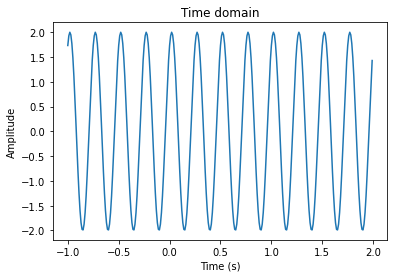

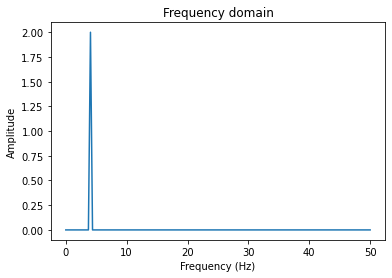

In [11]:
## sine waves

freq = 4
ampl = 2
phas = np.pi / 3

signal = ampl * np.sin(2 * np.pi * freq * time + phas)

## plotting
plt.plot(time, signal)
plt.title('Time domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# compute amplitude spectrum
amp = 2 * abs(scipy.fftpack.fft(signal) / pnts)
plt.plot(hz, amp[0:len(hz)])
plt.title('Frequency domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

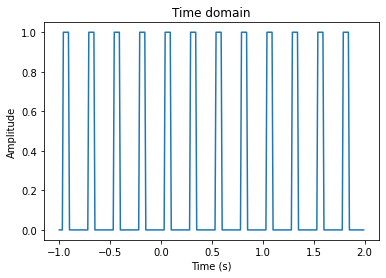

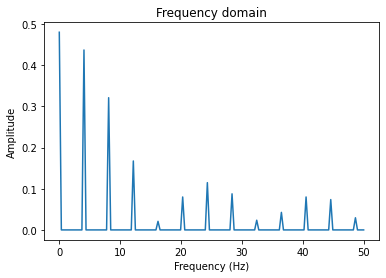

In [12]:
## square

freq = 4
signal = np.sin(2 * np.pi * freq * time) > .7

## plotting
plt.plot(time, signal)
plt.title('Time domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# compute amplitude spectrum
amp = 2 * abs(scipy.fftpack.fft(signal) / pnts)
plt.plot(hz, amp[0:len(hz)])
plt.title('Frequency domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

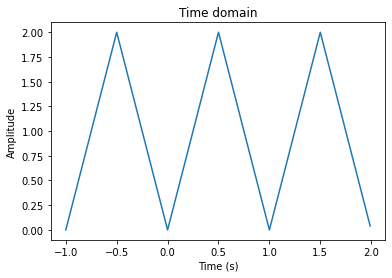

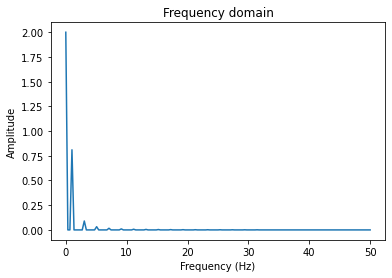

In [13]:
## triangle

a = 2  # amplitude modulator
m = 2  # frequency modulator
signal = a - a * np.abs(np.mod(m * time, 2) - 1)

## plotting
plt.plot(time, signal)
plt.title('Time domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# compute amplitude spectrum
amp = 2 * abs(scipy.fftpack.fft(signal) / pnts)
plt.plot(hz, amp[0:len(hz)])
plt.title('Frequency domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

---
# VIDEO: multicomponent oscillators
---


In [15]:
## simulation details for this video

# simulation details
srate = 100
time = np.arange(-1, 3, 1 / srate)
pnts = len(time)

hz = np.linspace(0, srate / 2, int(np.floor(len(time) / 2) - 1))

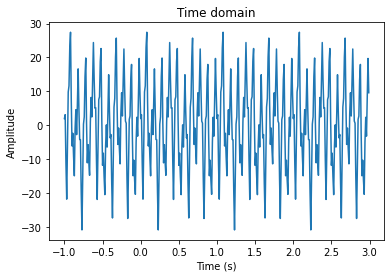

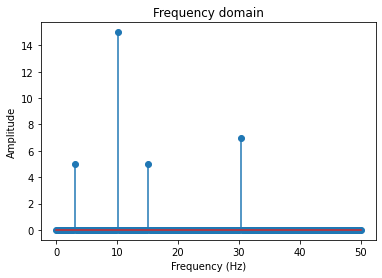

In [16]:
## multicomponent oscillators

frex = [3, 10, 15, 30]
amplit = [5, 15, 5, 7]
phases = [np.pi / 8, np.pi, np.pi / 2, -np.pi / 4]

# create sine waves
signal = np.zeros(len(time))

for fi in range(len(frex)):
  signal += amplit[fi] * np.sin(2 * np.pi * time * frex[fi] + phases[fi])

## plotting
plt.plot(time, signal)
plt.title('Time domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# compute amplitude spectrum
amp = 2 * abs(scipy.fftpack.fft(signal) / pnts)
plt.stem(hz, amp[0:len(hz)])
plt.title('Frequency domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

---
# VIDEO: Dipolar and multipolar chirps
---


In [17]:
## simulation details for this video

# simulation details
srate = 100
time = np.arange(-1, 2 - 1 / srate, 1 / srate)
pnts = len(time)

hz = np.linspace(0, srate / 2, int(np.floor(len(time) / 2) - 1))

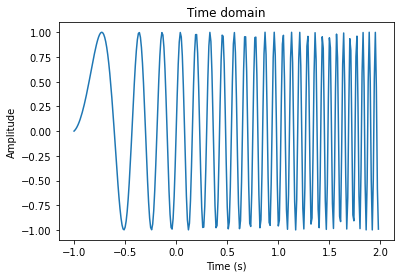

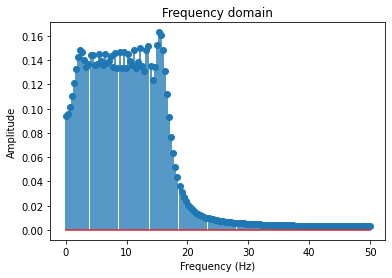

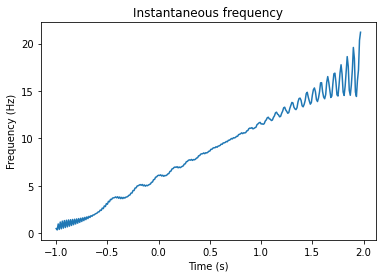

In [18]:
## dipolar chirps

# frequency ranges
f = [3, 20]

# this is the direct implementation of the formula
ff = f[0] + (np.mean(f) - f[1]) * np.arange(0, pnts - 1) / pnts

# but this implementation is easier to understand
ff = np.linspace(f[0], np.mean(f), pnts)

# compute signal
signal = np.sin(2 * np.pi * ff * time)

# instantaneous frequency
instfreq = np.diff(np.unwrap(np.angle(hilbert(signal)))) / (2 * np.pi / srate)

## plotting
plt.plot(time, signal)
plt.title('Time domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# compute amplitude spectrum
amp = 2 * abs(scipy.fftpack.fft(signal) / pnts)
plt.stem(hz, amp[0:len(hz)])
plt.title('Frequency domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

# instantaneous frequency
plt.plot(time[0:-1], instfreq)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Instantaneous frequency')
plt.show()

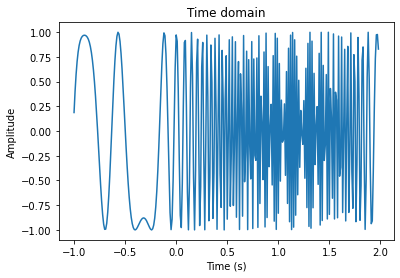

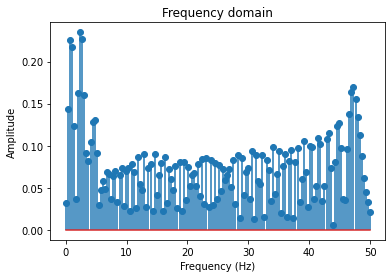

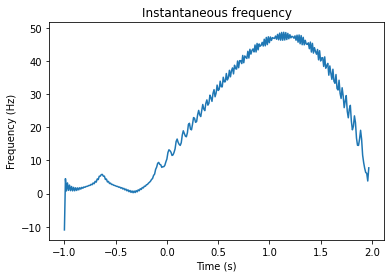

In [19]:
## multipolar chirps

# interpolating specific numbers
freqy = [3, 9, 45, 5]
freqmod = interpolate.interp1d(np.linspace(time[0], time[-1], 4),
                               freqy,
                               kind='cubic')

# now create the signal
signal = np.sin(2 * np.pi * (time + np.cumsum(freqmod(time)) / srate))

# instantaneous frequency
instfreq = np.diff(np.unwrap(np.angle(hilbert(signal)))) / (2 * np.pi / srate)

## plotting
plt.plot(time, signal)
plt.title('Time domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# compute amplitude spectrum
amp = 2 * abs(scipy.fftpack.fft(signal) / pnts)
plt.stem(hz, amp[0:len(hz)])
plt.title('Frequency domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

# instantaneous frequency
plt.plot(time[0:-1], instfreq)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Instantaneous frequency')
plt.show()

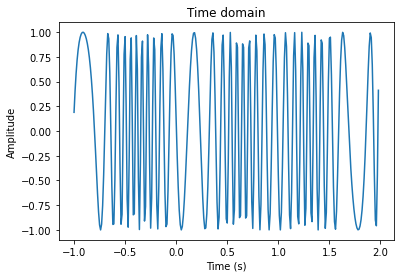

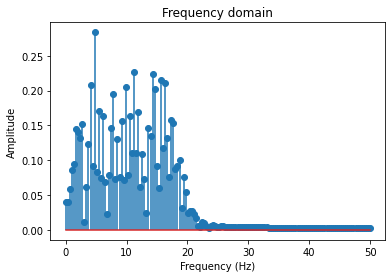

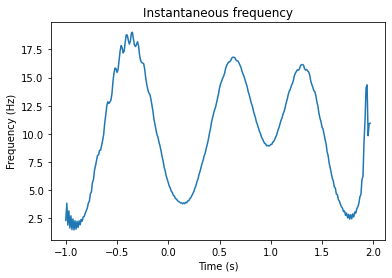

In [20]:
## frequency sliding chirps

# option 1: interpolating random numbers
freqy = interpolate.interp1d(np.linspace(time[0], time[-1], 10),
                             np.random.rand(10),
                             kind='cubic')
freqmod = 20 * np.cumsum(freqy(time))


# define a quick smoothing function
def smooth(y, k):
  box = np.ones(k) / k
  ys = np.convolve(y, box, mode='same')
  return ys


# option 2: smooth Gaussian
# freqmod = np.cumsum( smooth(np.random.randn(pnts),100)*20+10 )

# now create the signal
signal = np.sin(2 * np.pi * (time + freqmod / srate))

# instantaneous frequency
instfreq = np.diff(np.unwrap(np.angle(hilbert(signal)))) / (2 * np.pi / srate)

## plotting
plt.plot(time, signal)
plt.title('Time domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# compute amplitude spectrum
amp = 2 * abs(scipy.fftpack.fft(signal) / pnts)
plt.stem(hz, amp[0:len(hz)])
plt.title('Frequency domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

# instantaneous frequency
plt.plot(time[0:-1], instfreq)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Instantaneous frequency')
plt.show()